In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import scipy.stats as scp
%matplotlib inline

In [2]:
df = pd.read_csv('house-data/train.csv')
df = df[ df.select_dtypes(include=np.number).columns.tolist()]
df.dropna(inplace=True)

In [3]:
def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

In [4]:
#Decomposing the train set:
pca_train_results, pca_train = pca_dec(df, 10)
#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
df_new = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(df.columns)})
df_new = df_new.sort_values('PCA', ascending=False)
#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df_new)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
df_new.head()

,PCA,Variable Names
37,0.999535,SalePrice
3,0.029625,LotArea
16,0.004449,GrLivArea
12,0.003306,TotalBsmtSF
13,0.002830,1stFlrSF


In [5]:
y = df.SalePrice
x = df.TotalBsmtSF

In [6]:
def reg():
    data_linereg = np.polyfit(x,y,deg)
    xp = np.linspace(0,x.max(),30)
    lr = np.polyval(data_linereg,xp)
    return xp,lr,data_linereg

In [7]:
def plot(xp,lr):
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot()
    ax.grid()
    ax.scatter(x,y,s=1)
    ax.plot(xp,lr,color="Red")

   ### Pearson

In [8]:
def pearson(predicted_value,true_value):
    rel = scp.stats.pearsonr(predicted_value,true_value)
    return rel[0]**2

### Spearman

In [9]:
 def spear(predicted_value,true_value):
    rel = scp.stats.spearmanr(predicted_value,true_value)
    return rel[0]

### Kendall

In [10]:
def kendall(predicted_value,true_value):
    rel = scp.stats.kendalltau(predicted_value,true_value)
    return rel[0]

### Calculating Predicted Values

In [11]:
def values(lin_reg,x):
    predicted_value = np.polyval(lin_reg,x)
    return predicted_value,y

### Degree of polynomial

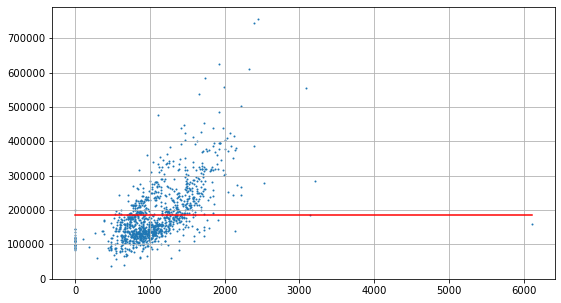

In [12]:
deg = 0
xp,lr,lin_reg = reg()
plot(xp,lr)

predicted_value,true_value = values(lin_reg,x)
#print(pearson(predicted_value,true_value))
#print(spear(predicted_value,true_value))
#print(kendall(predicted_value,true_value))

0.3789784261791577
0.618297885682969
0.4458832912139959


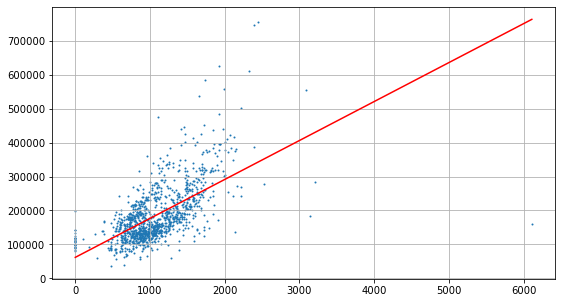

In [22]:
deg = 1
xp,lr,lin_reg = reg()
plot(xp,lr)
predicted_value,true_value = values(lin_reg,x)
print(pearson(predicted_value,true_value))
print(spear(predicted_value,true_value))
print(kendall(predicted_value,true_value))

0.4014339159427004
0.618297885682969
0.4458832912139959


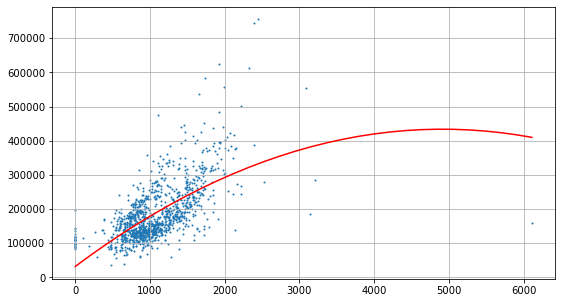

In [21]:
deg = 2
xp,lr,lin_reg = reg()
plot(xp,lr)
predicted_value,true_value = values(lin_reg,x)
print(pearson(predicted_value,true_value))
print(spear(predicted_value,true_value))
print(kendall(predicted_value,true_value))

0.4642562387906019
0.618891609781334
0.446403959011141


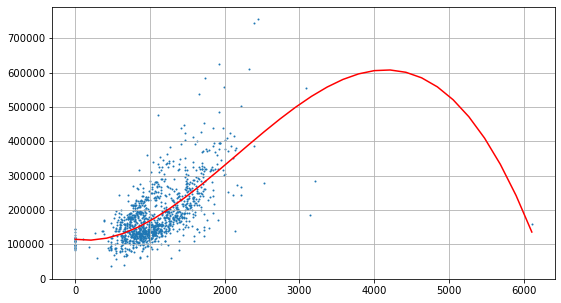

In [23]:
deg = 3
xp,lr,lin_reg = reg()
plot(xp,lr)
predicted_value,true_value = values(lin_reg,x)
print(pearson(predicted_value,true_value))
print(spear(predicted_value,true_value))
print(kendall(predicted_value,true_value))

0.4670789117331848
0.6168272097262473
0.4449761154201972


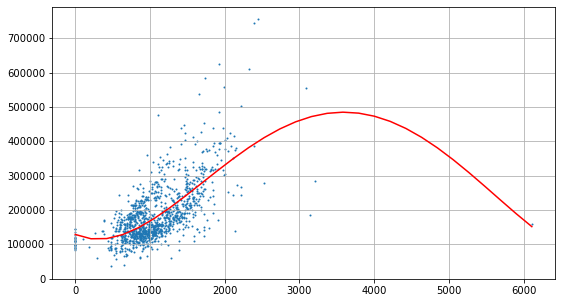

In [24]:
deg = 4
xp,lr,lin_reg = reg()
plot(xp,lr)
predicted_value,true_value = values(lin_reg,x)
print(pearson(predicted_value,true_value))
print(spear(predicted_value,true_value))
print(kendall(predicted_value,true_value))